In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
%matplotlib  inline

In [2]:
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


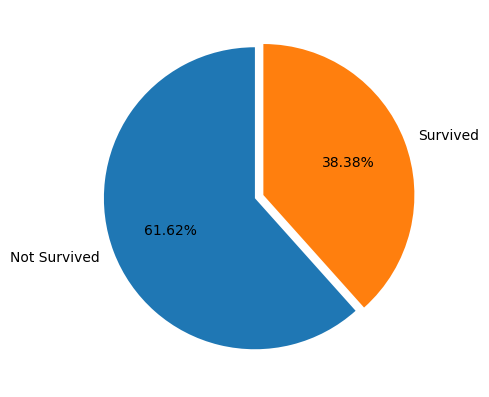

In [3]:
values = df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', 
                                   startangle = 90, explode = explode)

plt.show()

In [4]:
df.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
test.drop([ 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [5]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [6]:
df['Fare'] = df['Fare'].replace(0, df['Fare'].mean())
test['Fare'].fillna(test['Fare'].mean(), inplace = True)
test['Fare'] = test['Fare'].replace(0, test['Fare'].mean())

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
test['Age'].fillna(test['Age'].mean(), inplace = True)

In [8]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)

In [9]:
df['Sex'] = df['Sex'].apply(lambda val: 1 if val == 'male' else 0)
test['Sex'] = test['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [10]:
df['Embarked'] = df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [11]:
X=df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y=df[["Survived"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
ranfor = RandomForestClassifier()
ranfor.fit(X_train,y_train)
predictions = ranfor.predict(X_test)
accuracy_score(y_test, predictions)


c:\users\hayk sakoyan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8171641791044776

In [14]:
Test=test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
ranfor = RandomForestClassifier()
ranfor.fit(X_train,y_train)
Predictions = ranfor.predict(Test)

c:\users\hayk sakoyan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
output = pd.DataFrame({'PassengerId': test.PassengerId,
                       'Survived': Predictions})
output.to_csv('submission.csv', index=False)
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
